# Funciones de distribución de probabilidad

## Distribución uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
a = 1
b = 100
n = 1000000

data = np.random.uniform(a, b, n)

<Axes: ylabel='Count'>

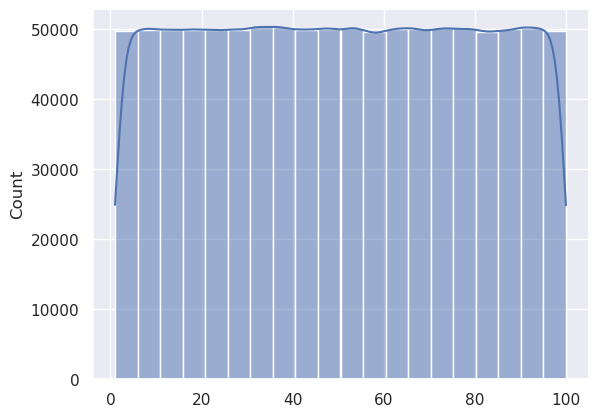

In [24]:
sns.histplot(data, bins=20, kde=True)

## Distribución normal

In [48]:
data = np.random.normal(size=1000000)

<Axes: >

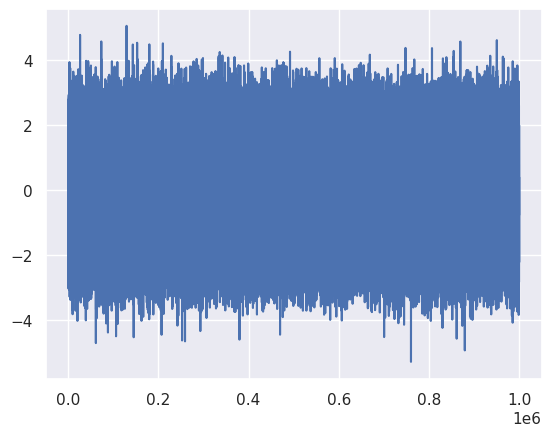

In [49]:
x = range(1, 1000001)
sns.set_theme()
sns.lineplot(x=x, y=data)


<Axes: ylabel='Count'>

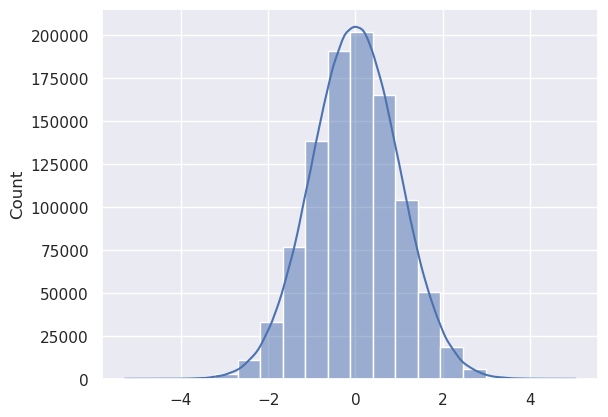

In [50]:
sns.histplot(data, bins=20, kde=True)

<Axes: >

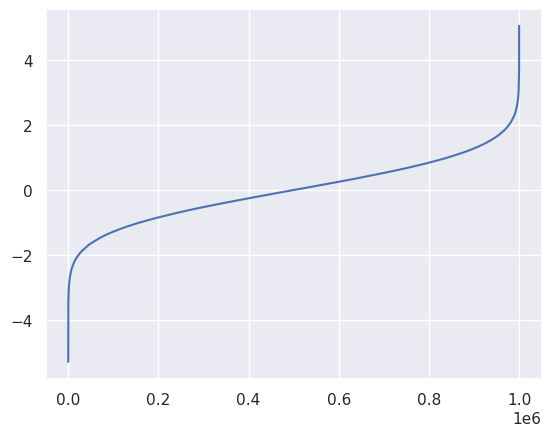

In [51]:
data2 = data.copy()
data2.sort()
sns.lineplot(x=x, y=data2)

In [53]:
mu, sd = 5.5, 2.5
s = np.random.normal(mu, sd, 1000000)

<Axes: ylabel='Count'>

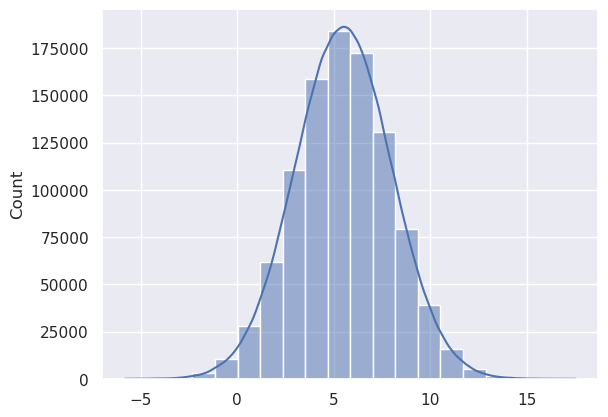

In [54]:
sns.histplot(s, bins=20, kde=True)

# Simulación de Monte Carlo

3.1414102399999995


<Axes: >

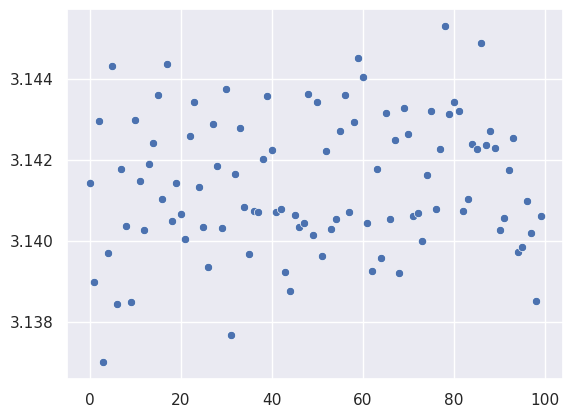

In [3]:
pi_avg = 0
n = 1000000
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0, 1, n).tolist()
    y = np.random.uniform(0, 1, n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z <= 1:
            value += 1
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value

pi = pi_avg / 100
print(pi)
sns.set_theme()
sns.scatterplot(pi_value_list)

In [10]:
def pi_monte_carlo(n, n_exp, seed=None):
    if seed is not None:
        np.random.seed(seed)
    pi_avg = 0
    pi_value_list = []
    for _ in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp
    fig = sns.scatterplot(data=pi_value_list)
    return pi, fig

3.1412014000000004


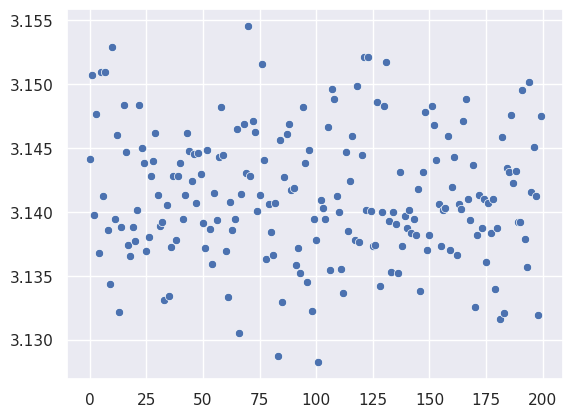

In [13]:
pi, fig = pi_monte_carlo(100000, 200, 1234)
print(pi)
plt.show(fig)

## Dummy datasets

In [8]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.normal(size=n),
        'B': np.random.uniform(5, 32, size=n),
        'C': np.random.normal(1.5, 2.5, n),
    }
)

In [9]:
data.head()

,A,B,C
0,0.489357,26.048718,4.686171
1,1.309818,30.259719,-1.411203
2,0.982242,18.115860,-3.178329
3,0.059604,13.765021,1.241755
4,-0.902782,25.965369,0.415560


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A,1000000.0,0.000406,0.999350,-5.239915,-0.673189,0.001143,0.673382,4.747895
B,1000000.0,18.509792,7.794346,5.000003,11.765891,18.504409,25.259021,31.999963
C,1000000.0,1.505341,2.499881,-10.066295,-0.177971,1.505614,3.189094,15.046795


<Axes: xlabel='A', ylabel='Count'>

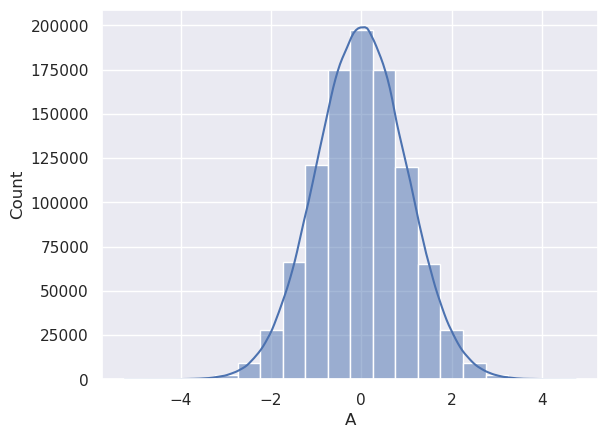

In [13]:
sns.set_theme()
sns.histplot(data['A'], bins=20, kde=True)

<Axes: xlabel='B', ylabel='Count'>

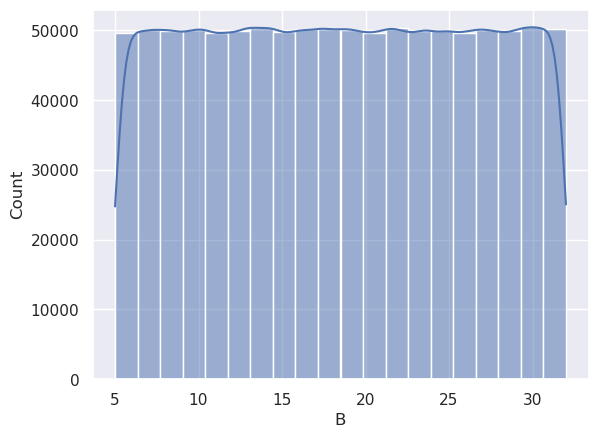

In [14]:
sns.histplot(data['B'], bins=20, kde=True)

<Axes: xlabel='C', ylabel='Count'>

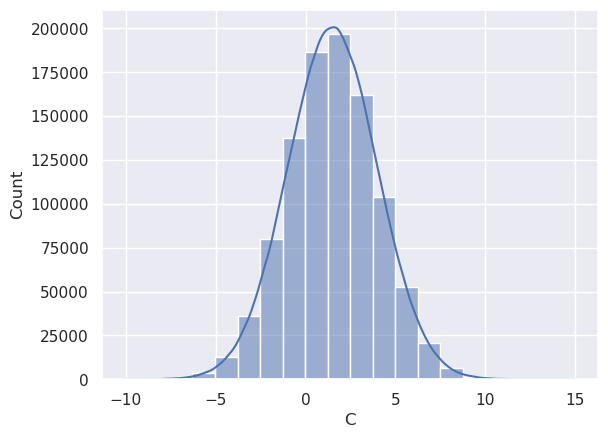

In [15]:
sns.histplot(data['C'], bins=20, kde=True)

In [19]:
data = pd.read_csv("./datasets/customer-churn-model/Customer-Churn-Model.txt")

In [20]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [25]:
column_names = data.columns.to_list()

In [27]:
a = len(column_names)
a

21

In [30]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.normal(size=a),
        'B': np.random.uniform(0, 1, a)
    }, index=range(42, 42 + a)
)

In [31]:
new_data

,Column Name,A,B
42,State,0.378118,0.804488
43,Account Length,-1.611645,0.631546
44,Area Code,0.023909,0.014477
45,Phone,0.020046,0.938251
46,Int'l Plan,0.839217,0.814999
47,VMail Plan,3.460542,0.466059
48,VMail Message,-0.122682,0.893005
49,Day Mins,-0.478814,0.855423
50,Day Calls,2.211355,0.364592
51,Day Charge,-0.634427,0.192911
